# Problem Session 9
## Classifying Cancer III

In this notebook you continue to work with the cancer data set that can be found here, <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29">https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29</a>. 


The problems in this notebook will cover the content covered in some of our `Classification`, `Dimension Reduction` and our `Ensemble Learning` notebooks. In particular we will cover content touched on in:
- `Classification/Support Vector Machines`
- `Classification/Decision Trees`,
- `Ensemble Learning/Random Forests` and
- `Dimension Reduction/Principal Components Analysis`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

##### 1. Load the data.

The data for this problem is stored in `sklearn`, here is the documentation page for that, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html">https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html</a>.

Run this code chunk to load in the data.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
## Loads the data from sklearn 
cancer = load_breast_cancer(as_frame=True)

## the 'data' entry contains the features
X = cancer['data']

## the 'target' entry contains what we would like to predict
y = cancer['target']

## Chaning the labels around
y = -y + 1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(),
                                                       shuffle=True,
                                                       random_state=214,
                                                       stratify=y,
                                                       test_size=.2)

##### 2. Refresher

Take a few minutes to remind yourselves about the cancer classification problem by reviewing `Problem Session 7` and `Problem Session 8` as needed. 

##### 3. Support Vector Classifer

Fill in the missing code below to find the average CV TPR, FPR and precision for a support vector classifier, `SVC` in `sklearn`, on the cancer data. Use a radial basis function kernel.

Remember to scale the data before fitting the support vector machine.

##### Sample Solution

In [5]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [6]:
svc_tprs = np.zeros(5)
svc_fprs = np.zeros(5)
svc_precs = np.zeros(5)


kfold = StratifiedKFold(5, random_state=403, shuffle=True)

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_tt = X_train.iloc[train_index,:]
    y_tt = y_train.iloc[train_index]
    X_ho = X_train.iloc[test_index,:]
    y_ho = y_train.iloc[test_index]
    
    pipe = Pipeline([('scale', StandardScaler()),
                        ('svc', SVC(kernel='rbf'))])
    
    pipe.fit(X_tt.values, y_tt)
    
    pred = pipe.predict(X_ho.values)
    
    conf_mat = confusion_matrix(y_ho, pred)
    
    svc_tprs[i] = conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1])
    svc_fprs[i] = conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1])
    svc_precs[i] = precision_score(y_ho, pred)
    
    i = i + 1

In [7]:
print("The AVG. CV. TPR is", np.round(np.mean(svc_tprs),4))
print("The AVG. CV. FPR is", np.round(np.mean(svc_fprs),4))
print("The AVG. CV. precision is", np.round(np.mean(svc_precs),4))

The AVG. CV. TPR is 0.9471
The AVG. CV. FPR is 0.0105
The AVG. CV. precision is 0.9828


##### 4. Optimizing explained variance for SVM

It is possible that we could improve the performance of our support vector classifier by preprocessing the data with PCA first.

Fill in the missing code in the chunks below to tune the fraction of total explained variance used in the PCA step.

What are the explained variance ratios with the best average CV TPR, FPR and precision?

##### Sample Solution

In [8]:
from sklearn.decomposition import PCA

In [9]:
fracs = np.arange(.01, 1, .01)

pca_tprs = np.zeros((5, len(fracs)))
pca_fprs = np.zeros((5, len(fracs)))
pca_precs = np.zeros((5, len(fracs)))

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_tt = X_train.iloc[train_index, :]
    X_ho = X_train.iloc[test_index, :]
    y_tt = y_train.iloc[train_index]
    y_ho = y_train.iloc[test_index]
    
    j = 0
    for frac in fracs:
        svc_pipe = Pipeline([('scale', StandardScaler()),
                                ('pca', PCA(n_components=frac)),
                                ('svc', SVC(kernel='rbf'))])
        
        svc_pipe.fit(X_tt.values, y_tt)
        
        pred = svc_pipe.predict(X_ho.values)

        pca_precs[i,j] = precision_score(y_ho, pred)
        
        
        conf_mat = confusion_matrix(y_ho, pred)
        
        pca_tprs[i,j] = conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1])
        pca_fprs[i,j] = conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1])
        j = j + 1

    i = i + 1

In [10]:
print("TPR")
print("==============================")
print("The explained variance ration with the highest avg. cv TPR was",
          fracs[np.argmax(np.mean(pca_tprs, axis=0))])
print("This feature produced a model with avg. cv. TPR of",np.round(np.max(np.mean(pca_tprs, axis=0)),4))
print()

print("FPR")
print("==============================")
print("The explained variance ration with the lowest avg. cv FPR was",
          fracs[np.argmin(np.mean(pca_fprs, axis=0))])
print("This feature produced a model with avg. cv. FPR of",np.round(np.min(np.mean(pca_fprs, axis=0)),4))
print()

print("Precision")
print("==============================")
print("The explained variance ration with the highest avg. cv Precision was",
          fracs[np.argmax(np.mean(pca_precs, axis=0))])
print("This feature produced a model with avg. cv. Precision of",np.round(np.max(np.mean(pca_precs, axis=0)),4))

TPR
The explained variance ration with the highest avg. cv TPR was 0.9600000000000001
This feature produced a model with avg. cv. TPR of 0.9529

FPR
The explained variance ration with the lowest avg. cv FPR was 0.97
This feature produced a model with avg. cv. FPR of 0.007

Precision
The explained variance ration with the highest avg. cv Precision was 0.97
This feature produced a model with avg. cv. Precision of 0.9882


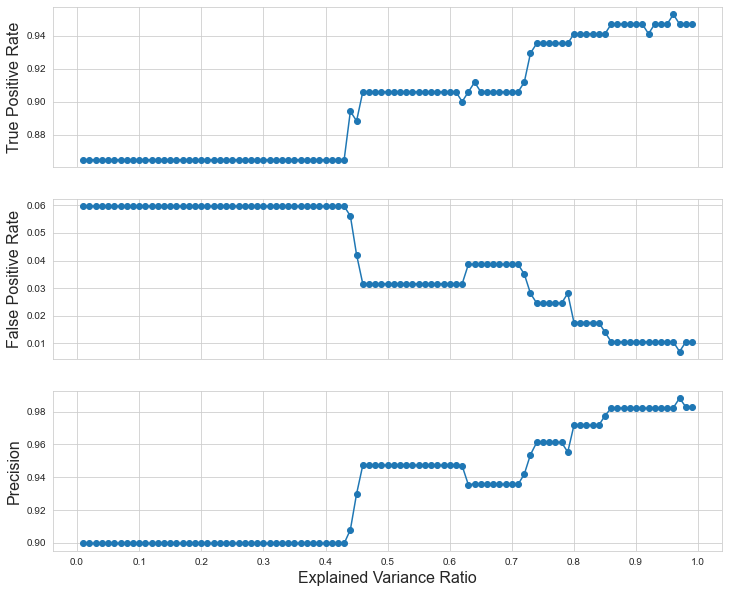

In [12]:
fig,ax = plt.subplots(3,1, figsize=(12,10), sharex=True)

## TPR
ax[0].plot(fracs, np.mean(pca_tprs, axis=0), '-o')
ax[0].set_ylabel("True Positive Rate", fontsize=16)

## FPR
ax[1].plot(fracs, np.mean(pca_fprs, axis=0), '-o')
ax[1].set_ylabel("False Positive Rate", fontsize=16)

## Precs
ax[2].plot(fracs, np.mean(pca_precs, axis=0), '-o')
ax[2].set_ylabel("Precision", fontsize=16)

ax[2].set_xlabel("Explained Variance Ratio", fontsize=16)
ax[2].set_xticks(np.arange(0,1.1,.1))

plt.show()

I would go with $0.9$ is close to its peak while being more stable.

##### 5. Planting  a tree

Using `sklearn`'s `DecisionTreeClassifier` to train a decision tree on the training data. For this tree use all of the default `sklearn` settings, that is do not pass any arguments to `DecisionTreeClassifier` when you define the model object.

##### Sample Solution

In [13]:
## import DecisionTreeClassifier here
from sklearn.tree import DecisionTreeClassifier

In [14]:
## define and fit the model here
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
## code here
pred = tree.predict(X_train)

confusion_matrix(y_train, pred)

array([[285,   0],
       [  0, 170]])

After inserting the variable name for your model, run the following snippet of code. This code will plot the decision tree that you just fit and save it in an image file labeled `cancer_dec_tree.png`. This file will be located in the `Problem Sets` folder in your repository. Open the image outside of the jupyter notebook to get a better look at it. 

<i>What are some of the sample sizes in the terminal nodes? Terminal nodes are those nodes with nowhere to go. In the image they will be a box without any arrows exiting them.</i>

In [16]:
from sklearn.tree import plot_tree

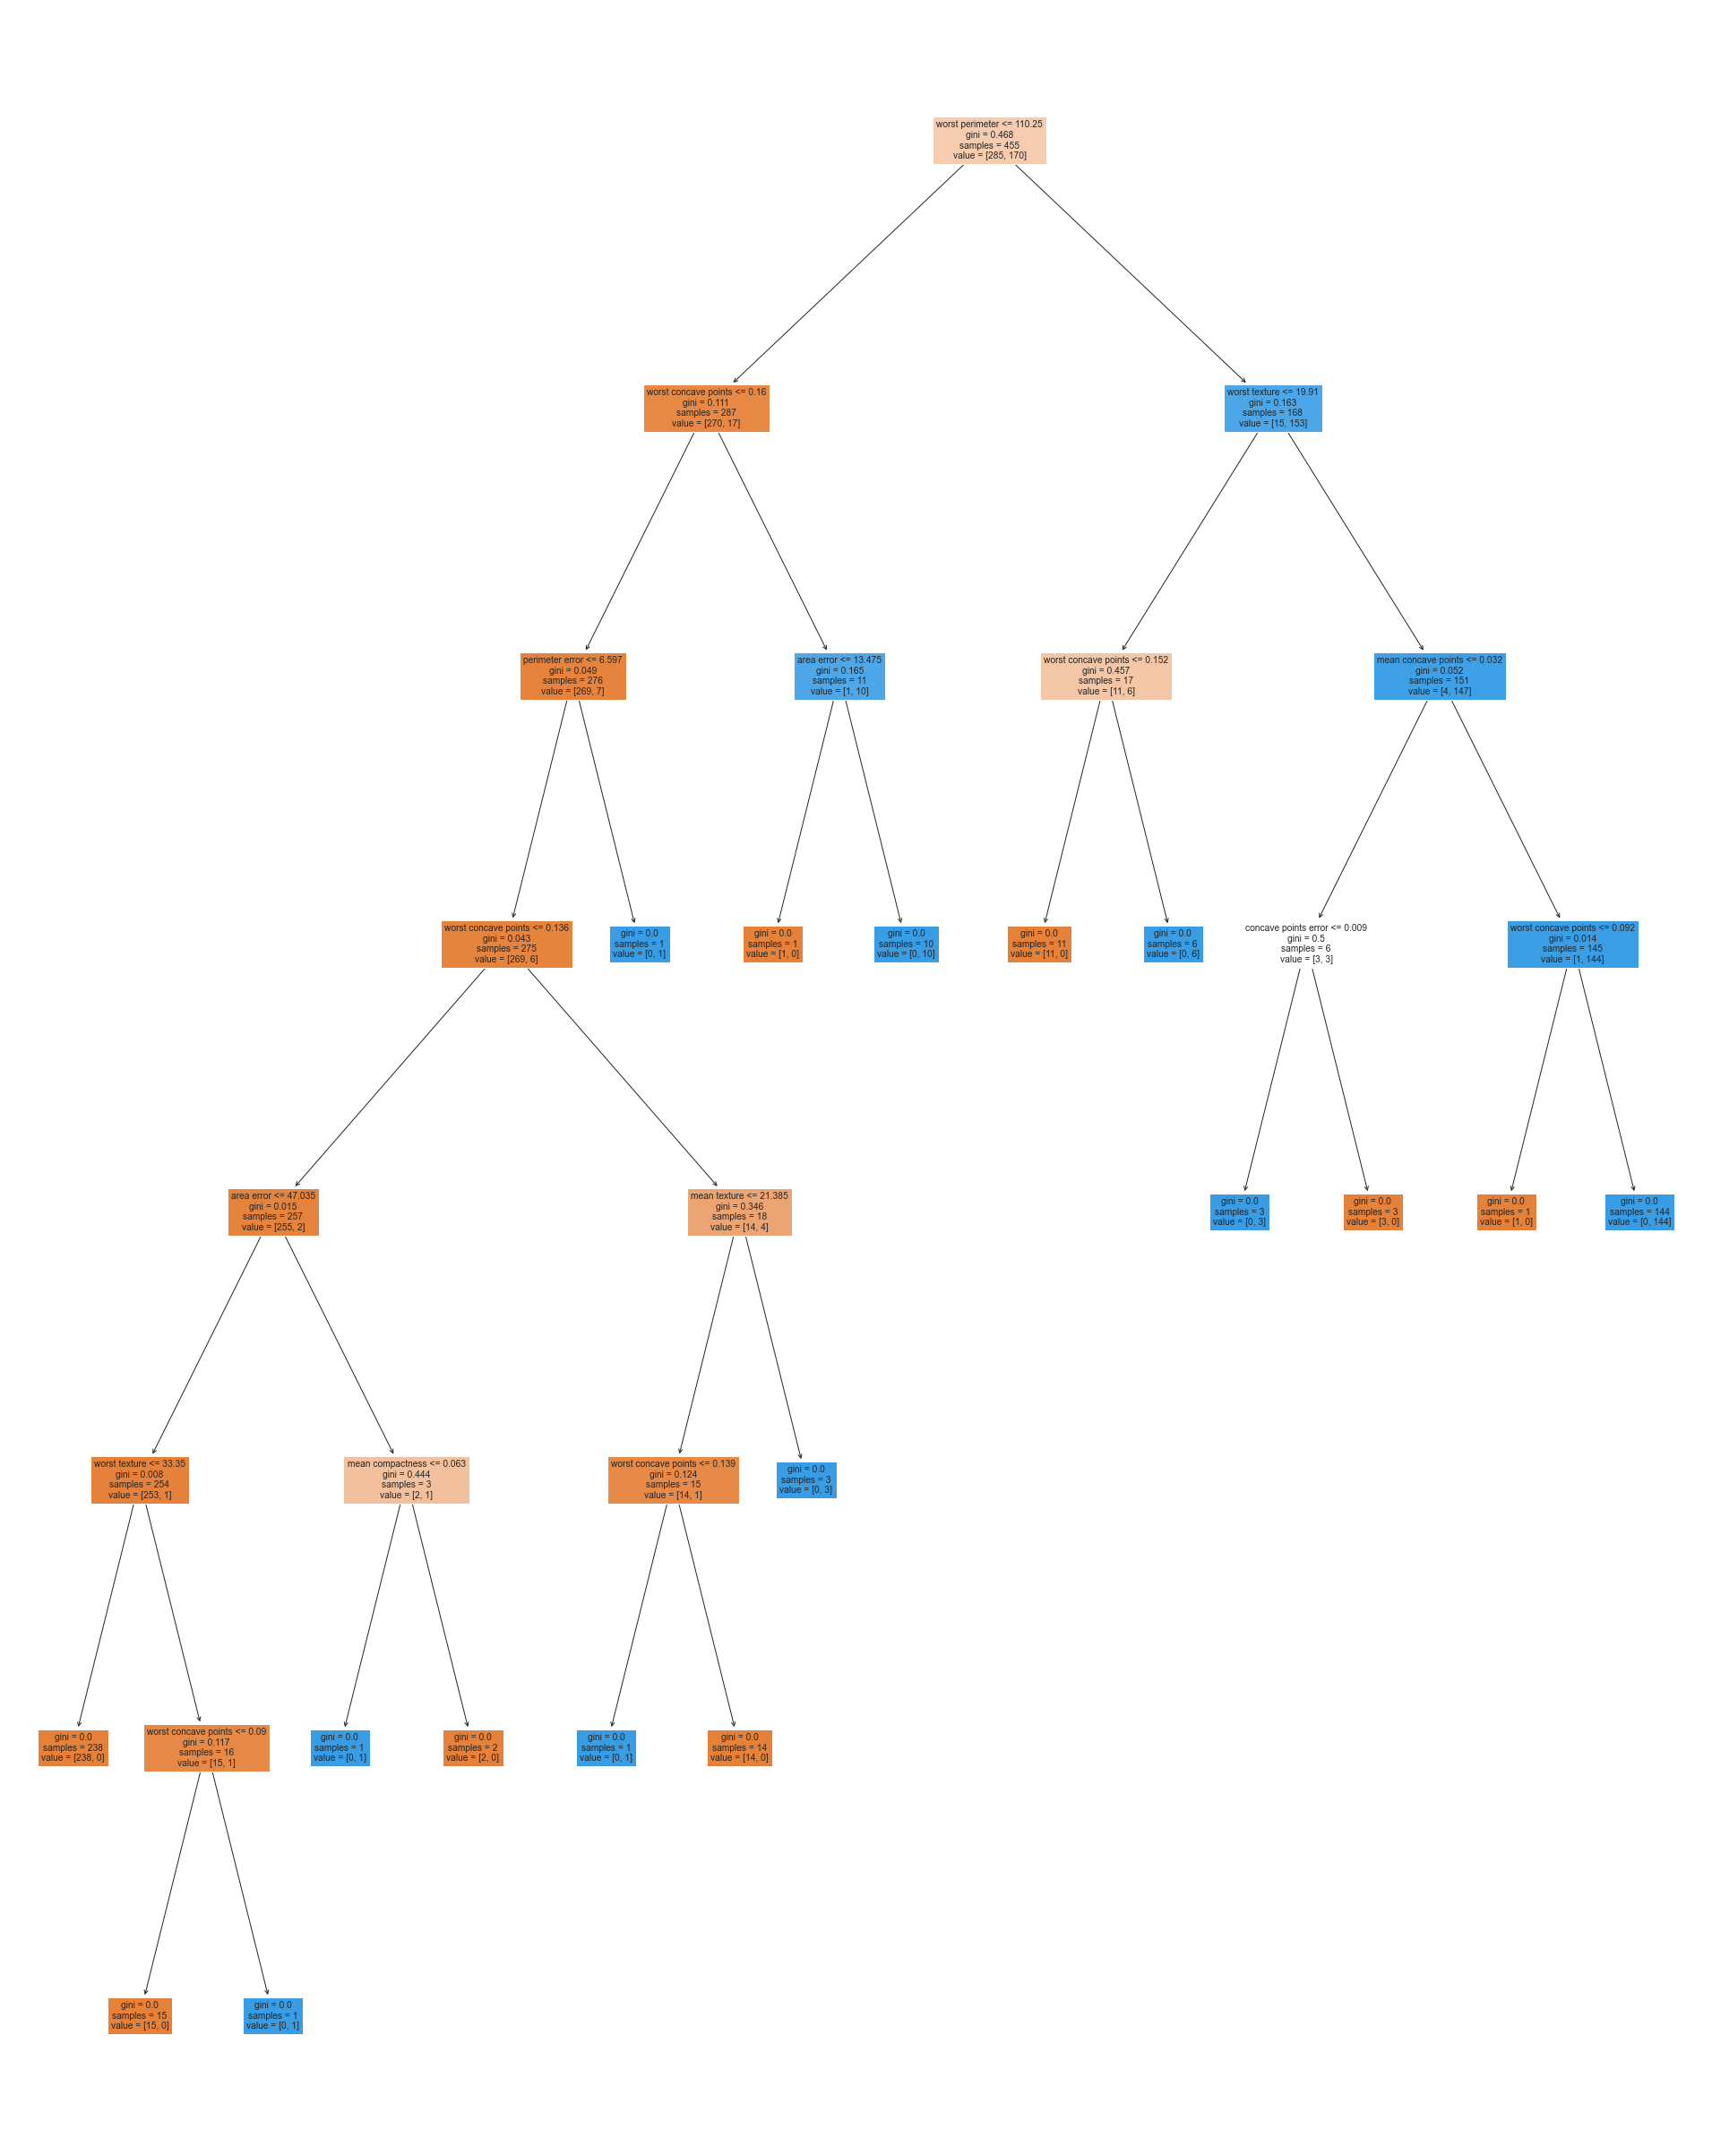

In [17]:
plt.figure(figsize=(34,44))

## Place the name of your  model below
out = plot_tree(tree, filled=True, feature_names = X_train.columns)


plt.savefig("cancer_dec_tree.png")
plt.show()

Yes.

##### 6. Assessing overfitting

Run the default model through 5-fold cross-validation, record the accuracy for the predictions on each cross-validation split's training <b>and</b> holdout set. Compare these two sets of accuracies.

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4124)

train_accs = np.zeros(5)
holdout_accs = np.zeros(5)

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_tt = X_train.iloc[train_index]
    y_tt = y_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_ho = y_train.iloc[test_index]
    
    tree = DecisionTreeClassifier()
    tree.fit(X_tt.values, y_tt)
    
    train_accs[i] = accuracy_score(y_tt, tree.predict(X_tt.values))
    holdout_accs[i] = accuracy_score(y_ho, tree.predict(X_ho.values))
    i = i + 1

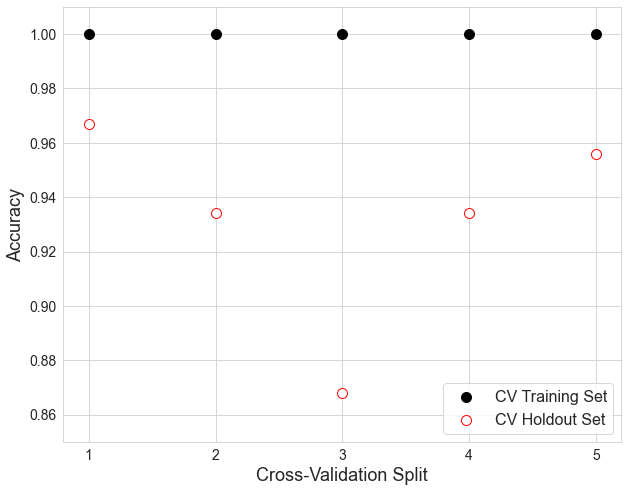

In [20]:
plt.figure(figsize=(10,8))

plt.scatter(range(1,6), train_accs, s=100, c='k', label='CV Training Set')
plt.scatter(range(1,6), holdout_accs, s=100, c='white', edgecolor='red', label='CV Holdout Set')

plt.xlabel("Cross-Validation Split", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.ylim(.85,1.01)

plt.legend(loc=4,fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(range(1,6),fontsize=14)

plt.show()

<i>Based on the past two questions, does it look like the default decision tree is overfitting on the training data?</i>

##### ANSWER

Yep.

##### 7. Hyperparameter tuning

Use cross-validation to find the optimal value for `max_depth` for TPR, FPR and precision. Place a `random_state =` argument when you define your `DecisionTreeClassifier`. If you are interested in what this does see the documentation here <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html</a>.

In [21]:
depths = range(1,9)

tree_tprs = np.zeros((5, len(depths)))
tree_fprs = np.zeros((5, len(depths)))
tree_precs = np.zeros((5, len(depths)))


i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_tt = X_train.iloc[train_index]
    y_tt = y_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_ho = y_train.iloc[test_index]
    
    j = 0
    for depth in depths:
        tree = DecisionTreeClassifier(max_depth=depth, random_state=332)
        tree.fit(X_tt.values, y_tt)

        pred = tree.predict(X_ho.values)

        tree_precs[i,j] = precision_score(y_ho, pred)        
        
        conf_mat = confusion_matrix(y_ho, pred)
        
        tree_tprs[i,j] = conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1])
        tree_fprs[i,j] = conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1])
        
        j = j + 1
    i = i + 1

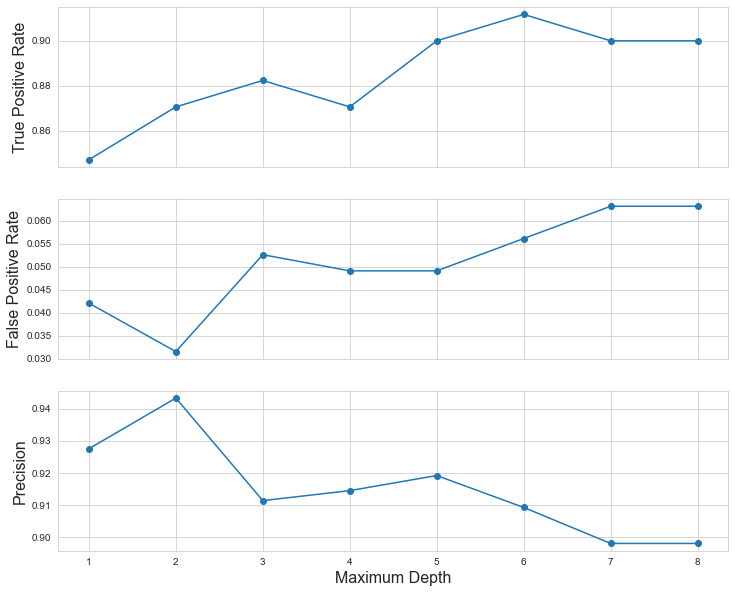

In [22]:
fig,ax = plt.subplots(3,1, figsize=(12,10), sharex=True)

## TPR
ax[0].plot(depths, np.mean(tree_tprs, axis=0), '-o')
ax[0].set_ylabel("True Positive Rate", fontsize=16)

## FPR
ax[1].plot(depths, np.mean(tree_fprs, axis=0), '-o')
ax[1].set_ylabel("False Positive Rate", fontsize=16)

## Precs
ax[2].plot(depths, np.mean(tree_precs, axis=0), '-o')
ax[2].set_ylabel("Precision", fontsize=16)

ax[2].set_xlabel("Maximum Depth", fontsize=16)

plt.show()

I would go with a max depth of 5.

#####  8. Random Forest

Using your answers to the previous question you will optimize the hyperparameter `n_estimators` to identify a random forest classifier with a good balance between TPR, FPR and precision.

Use cross-validation to find the value of `n_estimators` from `[10, 50, 100, 250, 500, 1000, 1500]` that gives the best performance for either metric. Set `max_samples=200` in your `RandomForestClassifier`.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
num_of_trees = [50, 100, 250, 500, 1000, 1500, 2000]

rf_tprs = np.zeros((5, len(num_of_trees)))
rf_fprs = np.zeros((5, len(num_of_trees)))
rf_precs = np.zeros((5, len(num_of_trees)))

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_tt = X_train.iloc[train_index]
    y_tt = y_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_ho = y_train.iloc[test_index]
    
    j = 0
    for num_trees in num_of_trees:
        rf = RandomForestClassifier(max_depth=5,
                                       max_samples = 200,
                                       n_estimators = num_trees,
                                       random_state = 432)
        
        rf.fit(X_tt, y_tt)
        pred = rf.predict(X_ho)
        
        conf_mat = confusion_matrix(y_ho, pred)
                
        rf_precs[i,j] = precision_score(y_ho, pred)
        rf_tprs[i,j] = conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1])
        rf_fprs[i,j] = conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1])
        
        j = j + 1
    i = i + 1

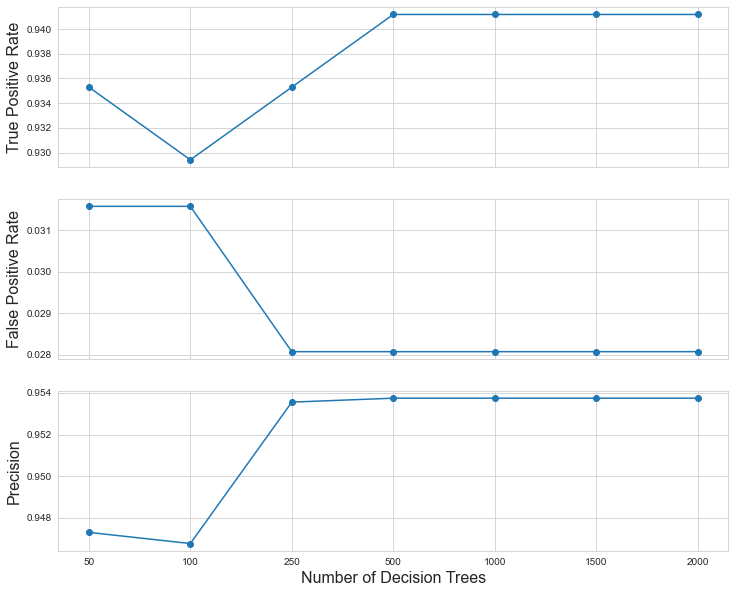

In [25]:
fig,ax = plt.subplots(3,1, figsize=(12,10), sharex=True)

## TPR
ax[0].plot(range(len(num_of_trees)), np.mean(rf_tprs, axis=0), '-o')
ax[0].set_ylabel("True Positive Rate", fontsize=16)

## FPR
ax[1].plot(range(len(num_of_trees)), np.mean(rf_fprs, axis=0), '-o')
ax[1].set_ylabel("False Positive Rate", fontsize=16)

## Precs
ax[2].plot(range(len(num_of_trees)), np.mean(rf_precs, axis=0), '-o')
ax[2].set_ylabel("Precision", fontsize=16)

ax[2].set_xlabel("Number of Decision Trees", fontsize=16)
ax[2].set_xticks(range(len(num_of_trees)))
ax[2].set_xticklabels(num_of_trees)

plt.show()

#####  9. Feature Importances

Use `RandomForestClassifier`'s `feature_importances_` method to examine which features are most important in determining whether or not a tumor is malignant or benign.

In [26]:
rf = RandomForestClassifier(max_depth=5,
                            n_estimators=1500, 
                            max_samples=200)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_samples=200, n_estimators=1500)

In [27]:
pd.DataFrame(rf.feature_importances_,
                index=X_train.columns,
                columns=['feature_importance_score']).sort_values('feature_importance_score', 
                                                                  ascending=False)

,feature_importance_score
worst perimeter,0.131697
worst radius,0.119879
worst area,0.119292
worst concave points,0.107416
mean concave points,0.100713
mean concavity,0.053632
mean perimeter,0.046246
mean area,0.046046
area error,0.043486
worst concavity,0.039080


--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)